In [1]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving IGCommentsExport_CwU-BtfJC11_100_comments ttg pengadaan F-15EX csv.csv to IGCommentsExport_CwU-BtfJC11_100_comments ttg pengadaan F-15EX csv.csv


In [3]:
df = pd.read_csv(file_name)

# Check available columns
print("Available columns:", df.columns.tolist())

# Preview first rows
print(df.head())


Available columns: ['User Id', 'Username', 'Comment Id', 'Comment Text', 'Profile URL', 'Avatar URL', 'Date']
       User Id            Username         Comment Id  \
0    963730614       steveabrahaam  18011807548798805   
1   2060970728  muhamadsidikwiguna  18024886432710727   
2  52835536054        tuyulborneoo  17880011846958053   
3   2060970728  muhamadsidikwiguna  17933127317759310   
4  60783307059      theon.eyouknow  18015969124894104   

                                        Comment Text  \
0  @theon.eyouknow emang kalau upgrade ke 70/72 l...   
1  @asprtx_ cintailah ploduk ploduk dalam negeri ...   
2                   @wic_96 produk nya aja gak ada 🗿   
3                                    @asprtx_ hahaha   
4  @steveabrahaam Lebih murah harusnya, yg kmrn I...   

                                    Profile URL  \
0       https://www.instagram.com/steveabrahaam   
1  https://www.instagram.com/muhamadsidikwiguna   
2        https://www.instagram.com/tuyulborneoo   
3  htt

In [8]:
comment_col = "Comment Text"

In [15]:
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    device=0
)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [16]:
def analyze_sentiment(text):
    result = sentiment_analyzer(str(text)[:512])[0]  # batasi 512 token
    label = result['label']  # contoh: "4 stars"

    stars = int(label.split()[0])  # ambil angka bintangnya

    # mapping ke kategori
    if stars <= 2:
        sentiment = "NEGATIVE"
    elif stars == 3:
        sentiment = "NEUTRAL"
    else:
        sentiment = "POSITIVE"

    return {"label": sentiment, "score": result['score'], "stars": stars}

In [17]:
df["analysis"] = df[comment_col].apply(analyze_sentiment)
df["sentiment"] = df["analysis"].apply(lambda x: x["label"])
df["score"] = df["analysis"].apply(lambda x: x["score"])
df["stars"] = df["analysis"].apply(lambda x: x["stars"])


In [18]:
print(df["sentiment"].value_counts())

sentiment
NEGATIVE    66
POSITIVE    20
NEUTRAL     14
Name: count, dtype: int64


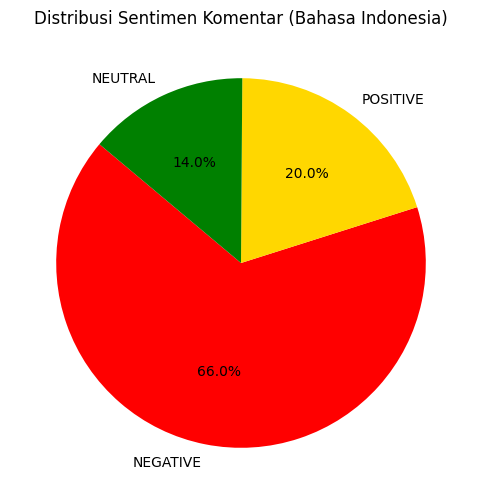

In [19]:
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["red", "gold", "green"]
)
plt.title("Distribusi Sentimen Komentar (Bahasa Indonesia)")
plt.show()


In [20]:
output_file = "sentiment_results.csv"
df.to_csv(output_file, index=False)

print("✅ Analysis finished! Results saved as:", output_file)
files.download(output_file)

✅ Analysis finished! Results saved as: sentiment_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>